# Importing dependencies

In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

# Initialize COCO API

Initializing the COCO API to fetch the annotations/captions and the images.

In [2]:
# initialize COCO api for caption annotations
dataDir='.'
dataType='val2014'
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
coco_caps=COCO(annFile)
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.18s)
creating index...
index created!
loading annotations into memory...
Done (t=0.14s)
creating index...
index created!


# Example of a single COCO API image with their captions

Here you can see an example of using the COCO API to get a random image, its captions and plotting the image.

ann_id = 260408
img_id: 388677
http://images.cocodataset.org/val2014/COCO_val2014_000000388677.jpg


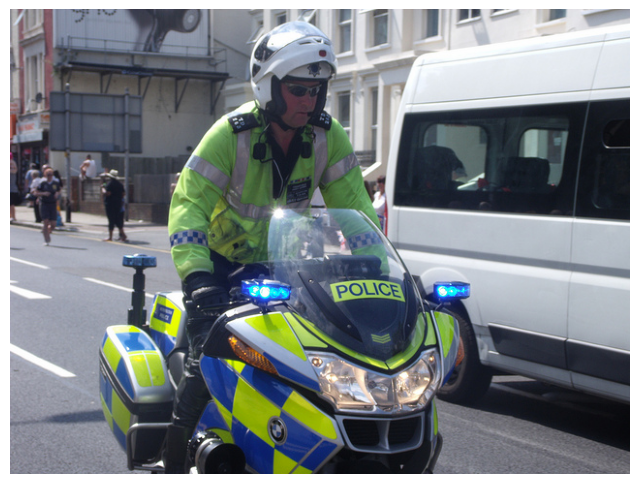

A cop riding a motorcycle next to a  white van.
A male police officer riding a blue and yellow motorcycle.
A police officer travels along on a checkered motorcycle.
The police officer is riding a police motorcycle.
A police office riding a police bike in a city area.


In [3]:
# get image ids
ids = list(coco.anns.keys())

# random select an index
ann_id = np.random.choice(ids)
print("ann_id = {}".format(ann_id))

# image id
img_id = coco.anns[ann_id]['image_id']
print("img_id: {}".format(img_id))

# image
img = coco.loadImgs(img_id)[0]

# url
url = img['coco_url']
print(url)

# plot
plt.imshow(io.imread(url))
plt.axis('off')
plt.show()

# print all captions
annIds = coco_caps.getAnnIds(imgIds=img_id);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)

# Download 50 random images with their captions and save them to a `.csv` file

We've already executed this for you, therefore we've provided 50 images and captions in a `.csv` file for you to benchmark the models.
However, if you want 50 different images,
simply run the next two blocks to download extra 50 images and appending the `id` of the image and the captions to the `captions.csv` file.

First we define helper functions.

In [5]:
def process_string(input_string):
    # Removing quotation marks
    processed_string = input_string.replace('"', '')

    # Removing white space before and after the string
    processed_string = processed_string.strip()

    # Removing the final "." if the string ends with it
    if processed_string.endswith('.'):
        processed_string = processed_string[:-1]

    return processed_string


def random_image():
    # get image ids
    ids = list(coco.anns.keys())

    # random select an index
    ann_id = np.random.choice(ids)

    # image id
    img_id = coco.anns[ann_id]['image_id']

    # image
    img = coco.loadImgs(img_id)[0]

    # url
    url = img['coco_url']

    # print all captions
    annIds = coco_caps.getAnnIds(imgIds=img_id);
    anns = coco_caps.loadAnns(annIds)

    captions = [process_string(obj['caption']) for obj in anns]       
    
    return {"id": img_id, "url": url, "captions": captions}

and then download the image and the captions 50 times and add the captions and image `id` to `captions.csv`.

In [17]:
import requests
import csv
import os

def save_image_and_captions(data):
    # Create the "images" folder if it doesn't exist
    if not os.path.exists("images"):
        os.makedirs("images")
    
    # Download the image
    response = requests.get(data["url"])
    if response.status_code == 200:
        # Save the image
        image_path = os.path.join("images", f"{data['id']}.jpg")
        with open(image_path, "wb") as file:
            file.write(response.content)
        
        # Write the captions to the CSV file
        csv_path = os.path.join("images", "captions.csv")
        with open(csv_path, "a", newline="") as file:
            writer = csv.writer(file)
            for caption in data["captions"]:
                writer.writerow([data["id"], caption])
    else:
        print("Failed to download the image")

# Download 50 images
for _ in range(50):
    data = random_image()
    save_image_and_captions(data)
